In [ ]:
!pip install neupy
# !pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

import sys
from neupy.algorithms import PNN, GRNN

np.set_printoptions(threshold=sys.maxsize)

In [3]:
step = 0.025
elipsPoints = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)
parabolaPoints = np.linspace(-1, 1, int(2/step), endpoint=True)

def f(value, a, shiftX):
    return a * np.cos(value) + shiftX

def g(value, b, shiftY):
    return b * np.sin(value) + shiftY

def rotate(size, x, y, alpha):
    if len(x) != len(y) or size != len(x):
        raise TypeError
    for i in range(size):
        xNew = x[i] * np.cos(alpha) - y[i] * np.sin(alpha)
        yNew = x[i] * np.sin(alpha) + y[i] * np.cos(alpha)
        x[i] = xNew
        y[i] = yNew

def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=20)
    return x_train, x_test

In [4]:
a1 = 0.4
b1 = 0.15
alpha1 = np.pi / 6
shiftX1 = 0
shiftY1 = 0

a2 = 0.7
b2 = 0.5
alpha2 = np.pi / 3
shiftX2 = 0
shiftY2 = 0

p3 = 1
alpha3 = np.pi / 2
shiftX3 = 0
shiftY3 = -0.8

In [5]:
print(len(elipsPoints))
print(len(parabolaPoints))

first = np.random.permutation(elipsPoints)[:120]
second = np.random.permutation(elipsPoints)[:100]
third = np.random.permutation(parabolaPoints)[:60]

251
80


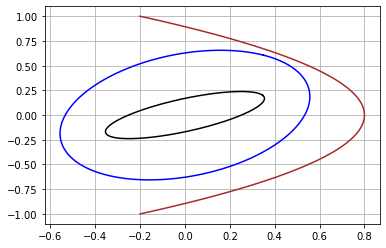

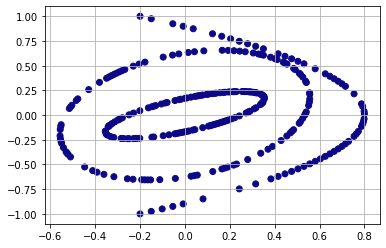

In [6]:
x1 = f(elipsPoints, a1, shiftX1)
y1 = g(elipsPoints, b1, shiftY1)
rotate(len(elipsPoints), x1, y1, alpha1)
x2 = f(elipsPoints, a2, shiftX2)
y2 = g(elipsPoints, b2, shiftY2)
rotate(len(elipsPoints), x2, y2, alpha2)
x3 = parabolaPoints + shiftX3
y3 = p3 * parabolaPoints * parabolaPoints + shiftY3
rotate(len(parabolaPoints), x3, y3, alpha3)

plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'blue')
plt.plot(x3, y3, 'brown')
plt.grid(True)
plt.show()

x1 = f(first, a1, shiftX1)
y1 = g(first, b1, shiftY1)
rotate(len(first), x1, y1, alpha1)
x2 = f(second, a2, shiftX2)
y2 = g(second, b2, shiftY2)
rotate(len(second), x2, y2, alpha2)
x3 = third + shiftX3
y3 = p3 * third * third + shiftY3
rotate(len(third), x3, y3, alpha3)

df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

for idx, df in enumerate((df1, df2, df3)):
    plt.scatter(df.x, df.y, c= df.target, cmap=plt.cm.plasma)
    plt.grid(True)
plt.show()

In [7]:
train = []
test = []

for df in (df1, df2 ,df3):
    tr, te = split_df(df)
    train.append(tr)
    test.append(te)
train = pd.concat(train)
test = pd.concat(test)

In [8]:
print(len(train))
print(len(test))

224
56


In [9]:
SPREAD = 0.1
model = PNN(std=SPREAD)
model.fit(train.iloc[:, :-1], train.target)

PNN(verbose=False, std=0.1, batch_size=128)

In [10]:
def mySoftMax(vector):
  answer = []
  for tmp in vector[-1]:
    if tmp[0] >= tmp[1] and tmp[0] >= tmp[2]:
      answer.append(0)
    elif tmp[1] >= tmp[0] and tmp[1] >= tmp[2]:
      answer.append(1)
    else:
      answer.append(2)
  return answer

In [11]:
p = []

p.append((model.predict_proba(train.iloc[:, :-1])).reshape(-1, 3))
print('Train score:', accuracy_score(train['target'], mySoftMax(p)))

p.append((model.predict_proba(test.iloc[:, :-1])).reshape(-1, 3))
print('Test score:', accuracy_score(test['target'], mySoftMax(p)))

Train score: 0.9910714285714286
Test score: 0.9642857142857143


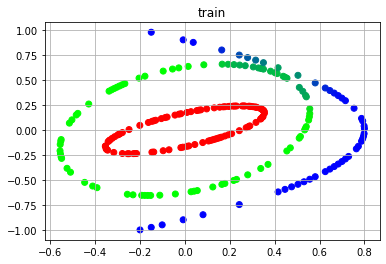

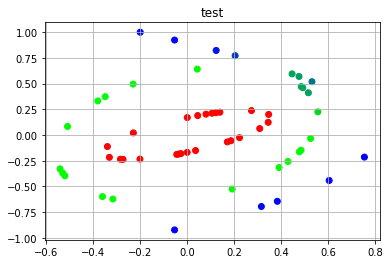

In [12]:
titles = ['train', 'test']
    
for idx, df in enumerate((train, test)):
    plt.scatter(df.x, df.y, c=p[idx])
    plt.grid(True)
    plt.title(titles[idx])
    plt.show()

In [13]:
h = 0.025
grid_pred = np.array([model.predict_proba(np.array([[i, j]])) for i in np.arange(-1.2, 1.2+h, h) for j in np.arange(-1.2, 1.2+h, h)])
grid_pred = grid_pred.reshape(-1, 3)

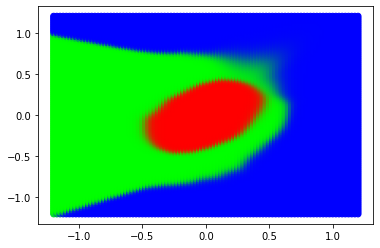

In [14]:
x_vals = np.arange(-1.2, 1.2+h, h)
y_vals = np.arange(-1.2, 1.2+h, h)

xx, yy = np.meshgrid(x_vals, y_vals)

plt.scatter(yy, xx, c=grid_pred)
plt.show()

In [15]:
# Вторая часть

In [16]:
model2 = SVC(kernel = 'rbf', gamma=0.9)
model2.fit(train.iloc[:, :-1], train.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
p = []

p.append(model2.predict(train.iloc[:, :-1]))
print('Train score:', accuracy_score(train['target'], p[-1]))

p.append(model2.predict(test.iloc[:, :-1]))
print('Test score', accuracy_score(test['target'], p[-1]))


Train score: 0.9419642857142857
Test score 0.9107142857142857


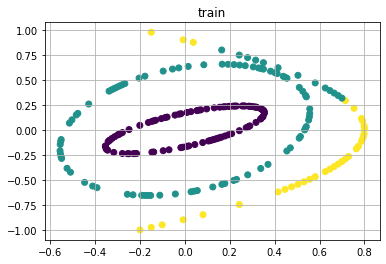

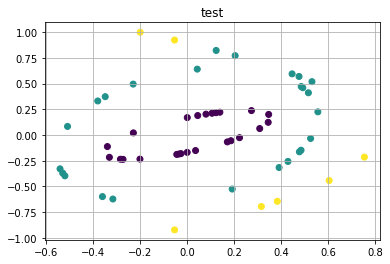

In [18]:
titles = ['train', 'test']

for idx, df in enumerate((train, test)):
    plt.scatter(df.x, df.y, c=p[idx])
    plt.grid(True)
    plt.title(titles[idx])
    plt.show()

In [19]:
h = 0.025
grid_pred = np.array([model2.predict(np.array([[i, j]])).round() for i in np.arange(-1.2, 1.2+h, h) for j in np.arange(-1.2, 1.2+h, h)])

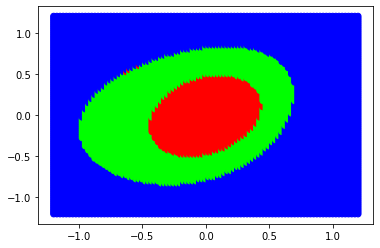

In [20]:
x_vals = np.arange(-1.2, 1.2+h, h)
y_vals = np.arange(-1.2, 1.2+h, h)

xx, yy = np.meshgrid(x_vals, y_vals)

lb = LabelBinarizer()
data = lb.fit_transform(grid_pred.flatten())

plt.scatter(yy, xx, c=data)
plt.show()

In [21]:
# Третья часть

350


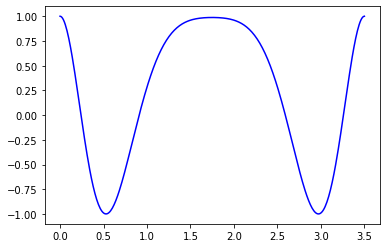

In [22]:
h = 0.01
t = np.linspace(0, 3.5, int(3.5/0.01), endpoint=True)
x = np.cos( (-2) * t ** 2 + 7 * t)
plt.plot(t, x, c = 'blue');
print(len(t))
plt.show()

In [23]:
SPREAD = h
train_size = 0.9
train_size = int(len(t) * train_size)
print(train_size)

315


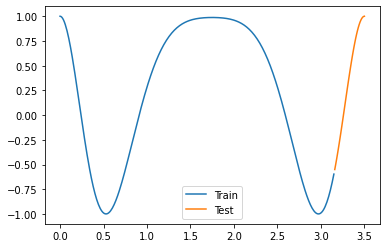

In [24]:
X_train = t[:train_size]
y_train = x[:train_size]
X_test = t[train_size:]
y_test = x[train_size:]

plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

# X_train, X_test, y_train, y_test = train_test_split(t, x, train_size=train_size, shuffle=True, random_state=76)

In [25]:
grnn = GRNN(std=SPREAD, verbose = True)
grnn.fit(X_train[:], y_train[:])


Main information

[ALGORITHM] GRNN

[OPTION] std = 0.01
[OPTION] verbose = True



GRNN(verbose=True, std=0.01)

RMSE = 0.0007962913088660272


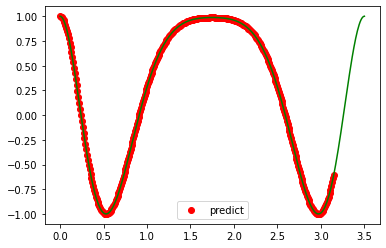

In [26]:
pred_x = grnn.predict(X_train[:])
# pred_x = scaler_y.inverse_transform(pred_x)
mse = mean_squared_error(y_train, pred_x)
print(f'RMSE = {np.sqrt(mse)}')

plt.plot(t, x, c = 'green');
plt.scatter(X_train, pred_x, label='predict', c = 'red')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/neupy/algorithms/rbfn/grnn.py:152: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T


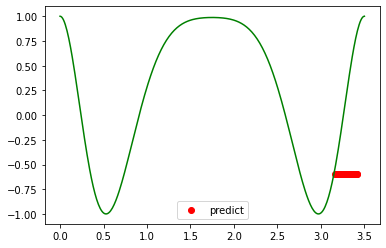

In [27]:
pred_x = grnn.predict(X_test[:])

plt.plot(t, x, c = 'green')
plt.scatter(X_test, pred_x, label='predict', c = 'red')
plt.legend()
plt.show()